### Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.
### Q2. Load the Wine Quality dataset and explore its dimensions.
Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification
### Q3. Check for null values, identify categorical variables, and encode them.
### Q4. Separate the features and target variables from the dataset.
### Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.
### Q6. Scale the dataset using an appropriate scaling technique.
### Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.
### Q8. Create a Sequential model in Keras and add the previously designed layers to it.
### Q9. Print the summary of the model architecture.
### Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.
### Q11. Compile the model with the specified loss function, optimizer, and metrics.
### Q12. Fit the model to the training data using appropriate batch size and number of epochs.
### Q13. Obtain the model's parameters (weights and biases).
### Q14. Store the model's training history as a Pandas DataFrame.
### Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.
### Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
# from tensorflow import keras
from tensorflow.keras import layers
import keras

In [4]:
# Q1. Install and load the latest versions of TensorFlow and Keras.
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.13.0
Keras version: 2.13.1


In [5]:
# Q2. Load the Wine Quality dataset and explore its dimensions.
wine_data = pd.read_csv("wine.csv")
print("Dataset dimensions:", wine_data.shape)

Dataset dimensions: (1599, 12)


In [6]:
# Q3. Check for null values, identify categorical variables, and encode them.
# Checking for null values
print(wine_data.isnull().sum())

# # Identifying categorical variables
# categorical_columns = ['type']

# # Encoding categorical variables
# wine_data = pd.get_dummies(wine_data, columns=categorical_columns, drop_first=True)
# quality: bad=0 and good=1
wine_data['quality'] = wine_data['quality'].replace({'bad': 0, 'good': 1})

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
# Q4. Separate the features and target variables from the dataset.
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

In [8]:
# Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [9]:
# Q6. Scale the dataset using an appropriate scaling technique.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.
input_dim = X_train_scaled.shape[1]

# Q8. Create a Sequential model in Keras and add the previously designed layers to it.
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=input_dim),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [11]:
# Q9. Print the summary of the model architecture.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Q10. Set the loss function('binary_crossentropy'), optimizer, and include the accuracy metric in the model.
# Q11. Compile the model with the specified loss function, optimizer, and metrics.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# Q12. Fit the model to the training data using appropriate batch size and number of epochs.
batch_size = 32
epochs = 10
history = model.fit(X_train_scaled, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val_scaled, y_val))

Epoch 1/10
35/35 [==============================] - 4s 33ms/step - loss: 0.6214 - accuracy: 0.6792 - val_loss: 0.5874 - val_accuracy: 0.7125
Epoch 2/10
35/35 [==============================] - 0s 12ms/step - loss: 0.5432 - accuracy: 0.7355 - val_loss: 0.5764 - val_accuracy: 0.7000
Epoch 3/10
35/35 [==============================] - 0s 8ms/step - loss: 0.5175 - accuracy: 0.7453 - val_loss: 0.5696 - val_accuracy: 0.6792
Epoch 4/10
35/35 [==============================] - 0s 4ms/step - loss: 0.5056 - accuracy: 0.7534 - val_loss: 0.5628 - val_accuracy: 0.6750
Epoch 5/10
35/35 [==============================] - 0s 4ms/step - loss: 0.4964 - accuracy: 0.7605 - val_loss: 0.5600 - val_accuracy: 0.6792
Epoch 6/10
35/35 [==============================] - 0s 4ms/step - loss: 0.4905 - accuracy: 0.7668 - val_loss: 0.5563 - val_accuracy: 0.6958
Epoch 7/10
35/35 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.7712 - val_loss: 0.5601 - val_accuracy: 0.6875
Epoch 8/10
35/35 [

In [14]:
# Q13. Obtain the model's parameters (weights and biases).
model_params = model.get_weights()
model_params

[array([[-1.89285114e-01, -2.06747428e-01,  2.40405634e-01,
          1.61863029e-01,  1.63154677e-01, -4.92653139e-02,
         -1.49111031e-02, -1.59508094e-01,  3.20163295e-02,
          2.64630467e-01, -2.99790978e-01,  2.13259265e-01,
          1.15525022e-01, -1.43609747e-01, -2.68207584e-02,
          6.47040009e-02, -1.92907169e-01, -1.73222110e-01,
          1.42335882e-02,  1.98877826e-01, -2.89368808e-01,
         -1.59453019e-01, -4.64085164e-03, -1.19498022e-01,
          1.63918570e-01,  1.94769740e-01, -1.19443916e-01,
          1.73874378e-01, -1.51126042e-01,  1.76586807e-01,
          1.19454078e-01,  1.98161691e-01, -4.51970659e-02,
          2.50591757e-03, -1.99859962e-02, -1.80405937e-02,
         -1.79733500e-01, -1.48570374e-01, -1.85575619e-01,
         -1.05982572e-01, -9.37953126e-04,  1.98673576e-01,
          2.59983152e-01,  1.43117875e-01, -4.77469042e-02,
         -2.02388033e-01,  1.64359510e-01, -2.05652807e-02,
         -2.42990568e-01,  1.66333914e-0

In [15]:
# Q14. Store the model's training history as a Pandas DataFrame.
history_df = pd.DataFrame(history.history)

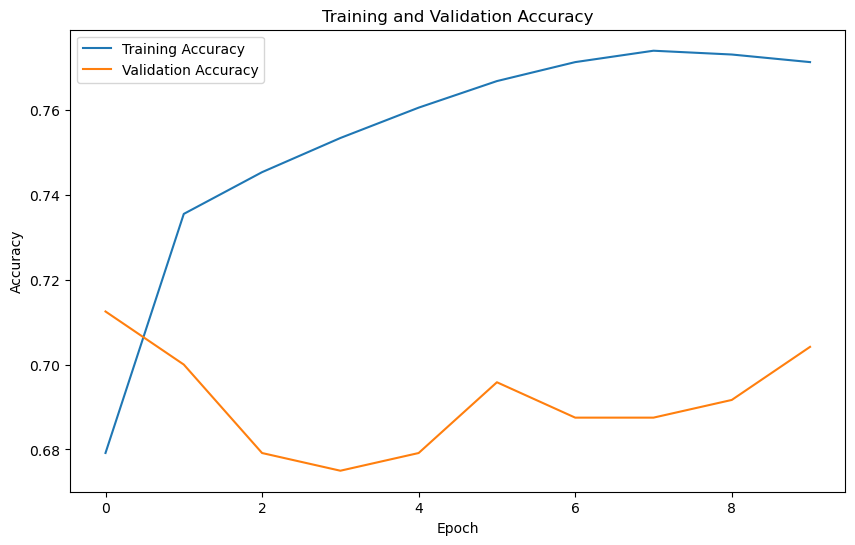

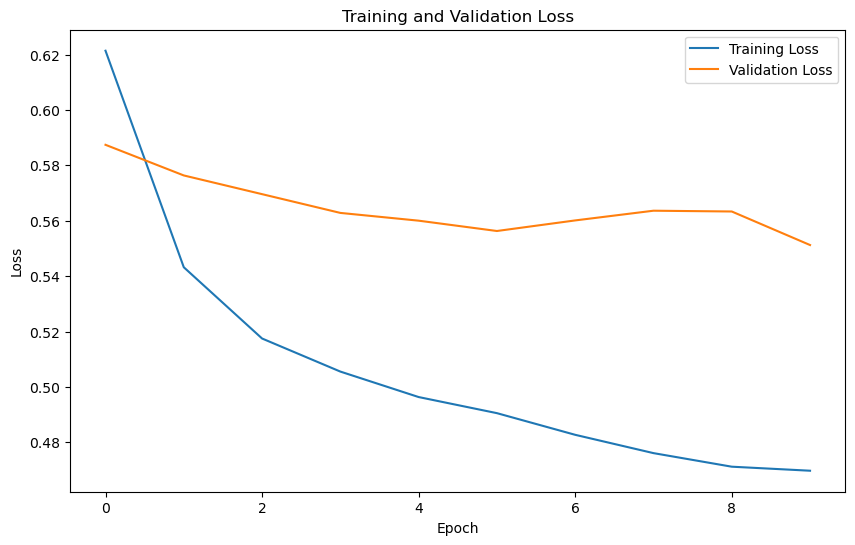

In [16]:
# Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [17]:
# Q16. Evaluate the model's performance using the test dataset and report relevant metrics.
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

8/8 [==============================] - 0s 5ms/step - loss: 0.4700 - accuracy: 0.7625
Test Loss: 0.4699613153934479
Test Accuracy: 0.762499988079071
